In [1]:
""""import bibliotek"""
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error as mea

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""wczytanie danych"""
df = pd.read_csv('./input/airmiles.csv')

In [3]:
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


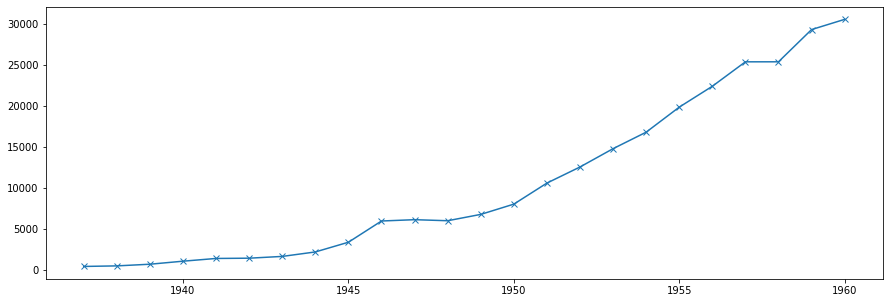

In [4]:
plt.figure(figsize=(15,5));#rozmiar okna
plt.plot(df.time,df.airmiles, 'x-'); #os x os y, o- kropki, x- krzyzyki


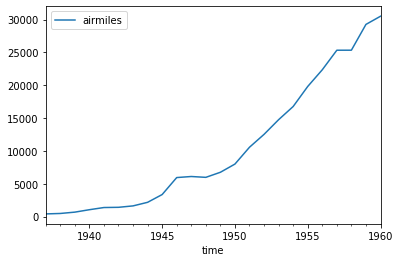

In [5]:
df = pd.read_csv('./input/airmiles.csv',parse_dates=['time'],index_col='time')#kolumna time na os x parsowane na date
df[['airmiles']].plot(); #plot wbudowany w pandas


In [6]:
"""funckja pomocnicza"""
def linear_func(airmiles, k = None, b=0):
    if k is None:
        mean_value = np.mean(airmiles)
        return [mean_value] * len (airmiles)
    return [idx * k+b for idx, _ in enumerate(airmiles)]    

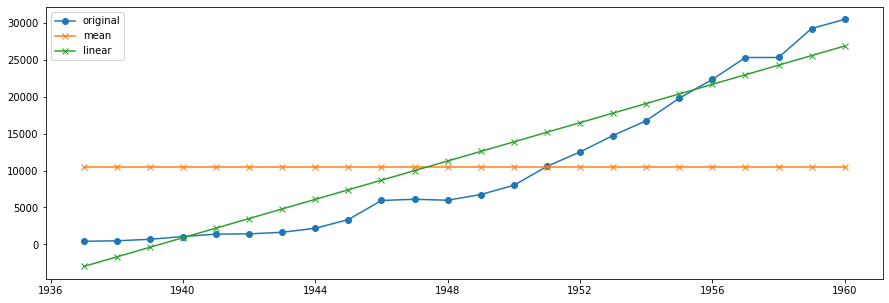

In [7]:
"""wykresy"""
plt.figure(figsize=(15,5));#rozmiar okna
plt.plot(df.index,df.airmiles, 'o-',label = 'original'); #os x os y, o- kropki, x- krzyzyki
plt.plot(df.index,linear_func(df.airmiles), 'x-',label = 'mean'); #os x os y, o- kropki, x- krzyzyki - srednia wszytskich wartosci
plt.plot(df.index,linear_func(df.airmiles,k = 1300, b = -3000), 'x-',label = 'linear'); #os x os y, o- kropki, x- krzyzyki

plt.legend();

## Metryka sukcesu

In [8]:
print ('mean = ',mea (df.airmiles,linear_func(df.airmiles)))
print ('linear = ',mea (df.airmiles,linear_func(df.airmiles,k = 1300, b = -3000)))

mean =  8499.305555555557
linear =  2935.0833333333335
